# Analisando transformadas com auto-valores e auto-vetores

Este capítulo está ligado ao seguintes objetivos didáticos do curos:
1. Interpretar e analisar transformações lineares
1. Aplicar a decomposição em valores singulares

Referências bibliográficas:

[Jim Hefferon - Linear Algebra - 4th Edition](https://hefferon.net/linearalgebra/) - Chap. Five, II.3

[Philip N. Klein - Coding the Matrix - 1st Edition](https://codingthematrix.com/) - Chap. 11-12

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import cv2 as cv
import pandas as pd
#import pygame

# Aula 5

# Parte 1

# Exercício 1
**Objetivo: Executar um sistema dinâmico e procurar por pontos de estabilidade**


No [capítulo 2](02-sistemas_lineares.ipynb), usamos uma matriz para representar dois sistemas que operam dinamicamente: a população de carcarás e sapos numa região fictícia, e a dinâmica de navegação de um web-surfista aleatório. Se precisar, revise esse material!

Esses dois sistemas são chamados de *sistemas dinâmicos* porque eles estão tratando de uma evolução de elementos ao longo do tempo. Como já falamos de carcarás e navegadores, vamos tratar agora de um outro sistema bem interessante, que é o de bicicletas públicas de Montreal.

Já por perto de 2010 a 2011, Montreal tinha um sistema de bicicletas públicas bastante parecido com as bicicletas Itaú que temos hoje em São Paulo. Só que Montreal é uma cidade que fica em uma montanha (cujo ponto mais alto é o [Mount Royal](https://www.google.com/maps/place/Mount+Royal+Park/@45.5023053,-73.6098349,14.25z/data=!4m13!1m7!3m6!1s0x4cc91a541c64b70d:0x654e3138211fefef!2sMontreal,+QC,+Canada!3b1!8m2!3d45.5018869!4d-73.5673919!3m4!1s0x4cc91a3b89d50ee1:0x4c8dc463a4718c9a!8m2!3d45.5015664!4d-73.5932179)), o que levou a um problema interessante: as pessoas tendem a tomar uma bicicleta emprestada na estação que fica na região mais alta e devolver em uma das estações das regiões mais baixas, mas raramente alguém faz o caminho inverso. O fim dessa história é que a [prefeitura contratou caminhões para ficarem levando bicicletas morro acima](https://www.csmonitor.com/World/Global-News/2011/0921/Montreal-s-public-bike-system-faces-uphill-battle), e uma consequência inesperada é que essa história seria um exemplo numa aula de álgebra linear dez anos depois num outro hemisfério.

---

Em nosso modelo, vamos fazer várias suposições que cabem para o nosso exemplo, mas que não necessariamente correspondem a dados reais.

* Vamos supor que temos três estações. As duas primeiras (E1 e E2) ficam na parte baixa da cidade. A outra estação (E3) fica na parte alta.
* Quando uma bicicleta é tomada emprestada em E1, ela tem 90% de chance de ser devolvida em E2 e 10% de chance de ser devolvida em E3.
* Quando uma bicicleta é tomada emprestada em E2, ela tem 95% de chance de ser devolvida em E1 e 5% de chance de ser devolvida em E3.
* Quando uma bicicleta é tomada emprestada em E3, ela tem 70% de chance de ser devolvida em E1 e 30% de chance de ser devolvida em E2.

Vamos supor que cada estação começa com 10 bicicletas, e que não há um limite máximo de bicicletas que podem ficar em cada estação.

Gostaríamos de saber:

(a) Após alguns dias de iterações aleatórias, quantas bicicletas esperamos encontrar em cada uma das estações?

(b) Com esses dados inventados, vai ser necessário contratar caminhões para levar bicicletas de alguma estação para outra? Para quais?

(c) Se, ao invés de começarmos nossas iterações com 10 bicicletas em cada estação, começarmos com todas as 30 bicicletas na estação E3, no topo do morro, devemos encontrar uma quantidade final de bicicletas diferente, ao fim de várias iterações?

---

In [ ]:
import numpy as np
x = np.array([[10], [10], [10]])
A = np.array( [ [0, 0.9, 0.1], [0.95, 0, 0.05], [0.7, 0.3, 0]]).T
x = A @ x

# (a)
for i in range(100):
    x = A @ x

print(x)

# (b) - Precisaremos levar bicicletas das estações 1 e 2 para a estação 3.

# (c)
x = np.array([[0], [0], [30]])
for i in range(100):
    x = A @ x

print(x) # O problema persiste.

[[14.34733143]
 [13.54116885]
 [ 2.11149972]]
[[14.3359374]
 [13.5519198]
 [ 2.1121428]]



Discussão sobre a solução:

Sob um ponto de vista matemático, um ciclista aleatório parece se comportar de uma maneira muito parecida com um web-surfista aleatório! Reveja o capítulo de sistemas lineares para uma explicação sobre isso: estamos falando de $P(s_t=e_i) = \sum_j P(s_t = i | s_{t-1}=j) P(s_{t-1}=e_j)$. Podemos representar nosso vetor de bicicletas como:

$$
x_0 = 30 \begin{bmatrix} 1/3 \\ 1/3 \\ 1/3 \end{bmatrix}
$$

e a matriz que representa as transições entre estações será a matriz $A$ de forma que $a[i,j]=P(s_t = i | s_{t-1}=j)$, isto é, a $a_{i,j}$ é a probabilidade de uma bicicleta ser deixada na estação $i$ sabendo que ela estava estação $j$:

$$
A = \begin{bmatrix} 
    0 & 0.9 & 0.7 \\
    0.95 & 0 & 0.3 \\
    0.05 & 0.1 & 0 
    \end{bmatrix}
$$



In [5]:
import numpy as np
# Comecei com as matrizes já digitadas no código 
x = np.array([[1], [1], [1]])/3
A = np.array( [ [0, 0.95, 0.05], [0.9, 0, 0.1], [0.7, 0.3, 0]]).T
# um passo: x = A @ x
# implemente 100 passos seguidos!
for _ in range(1000):
    x = A@x

# Número de bicicletas por estação = # total de bicicletas * P(bicicleta por estação)
print(x)

[[0.46634615]
 [0.46394231]
 [0.06971154]]


# Exercício 2
**Objetivo: calcular auto-valores e auto-vetores usando pacotes Python**

O problema das bicicletas de Montreal (assim como o PageRank e o problema dos carcarás do Capítulo 2) está ligado a uma característica de matrizes que é a existência de vetores e valores chamados de auto-valores e de auto-vetores. Quando um auto-vetor de uma matriz é multiplicado pela própria matriz, o resultado é um múltiplo do próprio vetor, isto é:

$$
Ax = x \lambda,
$$
onde: $A$ é a matriz, $x$ é o auto-vetor e $\lambda$ é o auto-valor correspondente.

Por exemplo:

$$
\begin{bmatrix} 
    2 & 0  \\
    0 & 1 
\end{bmatrix}
\begin{bmatrix} 
    1 \\
    0  
\end{bmatrix}
= 
\begin{bmatrix} 
    2 \\
    0  
\end{bmatrix}
=
2
\begin{bmatrix} 
    1 \\
    0  
\end{bmatrix},
$$
portanto $[1,0]^T$ é um auto-vetor de $[[2, 0],[0,1]]$, e $2$ é o auto-valor correspondente.

Se tivermos algum vetor na mesma direção de $x$ mas multiplicado por algum número real $\alpha$, isto é, $y=\alpha x$, podemos manter a mesma equação:

$$
A \alpha x = \alpha x \lambda \rightarrow Ay = y \lambda.
$$

a) No problema das bicicletas de Montreal, encontramos um auto-vetor da matriz $A$. Qual é esse auto-vetor, e qual é o auto-valor correspondente? 

Lembrando que:
$$
A = \begin{bmatrix} 
    0 & 0.9 & 0.7 \\
    0.95 & 0 & 0.3 \\
    0.05 & 0.1 & 0 
    \end{bmatrix}
$$

b) A instrução `values, vectors = np.linalg.eig(A)` retorna os auto-vetores da matriz A na variável `values` e os auto-valores correspondentes na variável `vectors`. Use essa função para calcular os auto-valores e auto-vetores da matriz $A$ do problema das bicicletas de Montreal.


In [8]:
# Resolva seu exercício aqui
A = np.array( [ [0, 0.95, 0.05], [0.9, 0, 0.1], [0.7, 0.3, 0]]).T

# (a) Trata-se do vetor [[0.46634615]
# [0.46394231]
# [0.06971154]]
# com autovalor 1.0

# (b)
values, vectors = np.linalg.eig(A)
print(values, vectors)


[ 1.         -0.91231056 -0.08768944] [[-0.70498394 -0.68507886 -0.19291753]
 [-0.70135     0.72724739 -0.5906272 ]
 [-0.1053842  -0.04216853  0.78354473]]


# Exercício 3
**Objetivo: auto-vetores e auto-valores como pontos de estabilidade, expansão, ou colapso**

 Vamos retomar o problema da população de carcarás e de sapos no Capítulo 2. Nesse problema, tínhamos a situação em que carcarás estão no mesmo habitat que sapos, obedecendo às seguintes regras:

* A população de carcarás naturalmente cai em 20% a cada mês
* Para cada cinco mil sapos existentes naquele mês, um novo carcará nasce
* A população de sapos naturalmente sobe em 10% porque eles se reproduzem
* A cada mês, cada carcará consegue comer 100 sapos

Isso significa que podemos escrever equações para calcular o número de carcarás e de sapos a cada mês, tomando por base a quantidade deles no mês anterior:

$$ 
\begin{cases}
    \begin{aligned}
    c_t & = 0.8 c_{t-1} + 0.2 s_{t-1} \\
    s_t & = - 0.1 c_{t-1} + 1.1 s_{t-1} \\
    \end{aligned}
\end{cases}
$$

Podemos fazer esse cálculo usando a operação matricial:
$$
\begin{bmatrix}
    c_t \\
    s_t 
\end{bmatrix}
=
\begin{bmatrix}
    0.8 & 0.2\\
    -0.1 & 1.1
\end{bmatrix} 
\begin{bmatrix}
    c_{t-1} \\
    s_{t-1}
\end{bmatrix}
$$

Como já vimos, podemos calcular a dinâmica da população ao longo do tempo partindo, por exemplo, de 600 carcarás e 500 mil sapos:

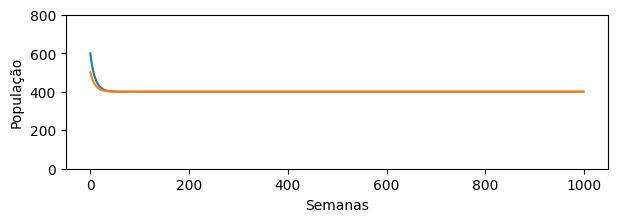

In [9]:
import matplotlib.pyplot as plt
A = np.array([[0.8, 0.2], [-0.1,  1.1]])
x = np.array([[600], [500]])
populacao_carcaras = []
populacao_sapos = []
for _ in range(1000):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A @ x

plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
plt.ylim([0,800])
plt.ylabel('População')
plt.xlabel('Semanas')
plt.show()

a) Usando a função `np.linalg.eig`, encontre os auto-valores e auto-vetores da matriz que representa a dinâmica da população de carcarás e sapos. 


In [12]:
# Resolva seu exercício aqui
values, vectors = np.linalg.eig(A)
print(values)
print(vectors)

[0.9 1. ]
[[-0.89442719 -0.70710678]
 [-0.4472136  -0.70710678]]



b) Qual é o auto-vetor correspondente ao auto-valor $1$?


$$\begin{bmatrix} -0.707 \\ -0.707 \end{bmatrix}$$


c) Como esse auto-vetor corresponde à dinâmica de população que observamos ao simular o sistema?



O ponto de estabilidade está na direção desse vetor.



d) O que acontece com o sistema se as condições iniciais forem iguais ao auto-vetor correspondente ao outro auto-valor?



A população vai cair até chegar a zero.




e) Explique essa dinâmica usando o conceito de auto-valores e auto-vetores, isto é, a equação $Ax = x \lambda$ onde $A$ é a matriz da dinâmica, $x$ é o auto-vetor e $\lambda$ é o auto-valor correspondente.

Se inicializo meu sistema no ponto $x$ tal que $Ax = 0.9x$, então a cada iteração do sistema meus valores em $x$ são multiplicados por $0.9$, caido lentamente até chegar a zero.

# Exercício 4
*Objetivo: encontrar uma matriz à partir de seus auto-valores e auto-vetores*

Em algumas situações (por exemplo, quando estou montando essa lista de exercícios - mas, de forma mais geral, quando estamos projetando sistemas dinâmicos), gostaríamos de encontrar matrizes que têm os autovalores e autovetores que queremos. Para isso, vamos escrever a equação de autovetores e autovalores na forma matricial.

Quando estamos falando de somente um auto-vetor, podemos escrever:

$$
Ax = x \lambda
$$

Porém, se tivermos dois auto-vetores, e seus auto-valores correspondentes, temos na verdade um sistema:

$$
\begin{cases}
Ax_1 = x_1 \lambda_1 \\
Ax_2 = x_2 \lambda_2 
\end{cases}
$$

Esse sistema pode ser escrito na forma de uma multiplicação matricial, se assumirmos que nossos auto-vetores são vetores-coluna:

$$
A \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} 
$$

Multiplicando os dois lados da equação por $\begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}$, ficamos com:

$$
A \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}\begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}
$$

e, portanto:
$$
A = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}
$$

Por exemplo, se quiséssemos uma matriz cujos auto-valores são $0.7$ e $0.2$ e os auto-vetores correspondentes são $[1,0]^T$ e $[0.5, 0.5]^T$, então deveríamos calcular:

$$
A = \begin{bmatrix} 1 & 0.5 \\ 0 & 0.5 \end{bmatrix} \begin{bmatrix} 0.7 & 0 \\ 0  & 0.2 \end{bmatrix} \begin{bmatrix} 1 & 0.5 \\ 0 & 0.5 \end{bmatrix}^{-1}
$$

Encontre a matriz com autovetores $[1,0]^T$ e $[0.5, 0.5]^T$ e autovalores $0.7$ e $0.2$.

In [13]:
# Resolva seu exercício aqui

P = np.array([[1,0], [0.5,0.5]]).T
Q = np.diag([1,0.5])
A = P @ Q @ np.linalg.inv(P)
print(A)

[[ 1.  -0.5]
 [ 0.   0.5]]


# Exercício 5
*Objetivo: relacionar autovalores ao colapso, explosão e ao equilíbrio de sistemas dinâmicos*

Até o momento, usamos um vetor $v$ para representar o estado de sistemas - a quantidade de bicicletas nas estações em algum momento, a quantidade de animais em alguma semana, e assim por diante. Vamos chamar nossa condição inicial de $v_0$, significando o vetor de estados $v$ no tempo $0$ (e, portanto, $v_1$ é o estado após uma iteração, e $v_{223}$ é o estado após $223$ iterações).

Quando aplicamos uma matriz sobre um vetor de estados qualquer $v_0$, isto é, quando damos um passo em nosso sistema dinâmico, temos a situação:

$$
v_1 = A v_{0}
$$

Podemos aplicar novamente a matriz sobre $v_1$, encontrando:
$$
v_2 = A v_1 = A A v_0 = A^2 v_0.
$$

E, ao longo de $N$ iterações, teremos:
$$
v_N = A^N v_0
$$
---

Isso é  o que fizemos diversas vezes até este momento. Vamos agora re-escrever essa mesma equação na usando a forma de autovalores e autovetores. As passagens que seguem parecem um pouco longas porque as expressões são longas, mas são somente a consequência de trocar $A$ nas equações acima pela decomposição matricial:

$$
A = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}
$$

Aplicando essa mudança na primeira expressão, temos:

$$
v_1 = A v_0 = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} v_{0}
$$

Na segunda iteração, temos:

$$
v_2 = A v_1 = \left( A \right) A v_0 = \left( \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} \right) \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}v_0
$$

Veja que podemos simplificar a multiplicação $ \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}$ no meio da cadeia de multiplicações, já que ela é igual à identidade. Ficamos então com:

$$
v_2 = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}v_0
$$

Podemos resumir a multiplicação matricial $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}$ como $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}^2$, ficando com:

$$
v_2 = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^2 \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}v_0
$$

Fazendo uma nova multiplicação por $A$, vamos encontrar:
$$
v_3 = \left( A \right) v_2 = \left( \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} \right) \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^2 \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}v_0
$$

Novamente, podemos trocar a multiplicação matricial $ \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}$ pela identidade, e agrupar $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}^2$ como $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}^3$, ficando com:

$$
v_3 = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^3 \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} v_0
$$

Podemos fazer essa mesma operação $N$ vezes, ficando com:

$$
v_N = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^N \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} v_0
$$

Como $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^N = \begin{bmatrix} \lambda_1 ^N & 0 \\ 0 & \lambda_2 ^N \end{bmatrix}$, a expressão fica:

$$
v_N = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1^N & 0 \\ 0 & \lambda_2^N \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1} v_0
$$

---

Veja que agora sabemos que:
$$
A^N = \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix} \begin{bmatrix} \lambda_1^N & 0 \\ 0 & \lambda_2^N \end{bmatrix} \begin{bmatrix} \vert & \vert \\ x_1 & x_2 \\ \vert & \vert \end{bmatrix}^{-1}
$$ 

Usando valores à sua escolha e supondo que $A \in \mathbb{R}^{2\times 2}$, monte exemplos que mostrem o que acontece com os valores de $A^N$ se:

1. Todos os auto-valores forem positivos e menores que 1.
2. Somente um auto-valor for igual a 1, e os demais forem positivos e menores que 1.
3. Um dos auto-valores for maior que 1.
4. Todos os auto-valores forem iguais a 1.
5. Relacione as suas respostas anteriores aos conceitos de *explosão* (tender ao infinito ao longo de muitas iterações), *colapso* (tender a zero ao longo de muitas iterações) e *equilíbrio* (tender a um valor constante não-zero ao longo de muitas iteraçõees).

In [18]:
S = np.array( [[1, 0], [0.5, 0.5]]).T # Provavelmente podemos resolver este exercício sem alterar isso.
L = np.array( [ [0.7, 0], [0, 0.2] ]) # Você provavelmente quer alterar esta linha!

# 1.
A = S @ L @ np.linalg.inv(S)
x = np.array([[1000], [2000]])
for _ in range(100):
    x = A @ x
print(x)

# 2.
L = np.array( [ [1, 0], [0, 0.5] ])
A = S @ L @ np.linalg.inv(S)
x = np.array([[1000], [2000]])
for _ in range(100):
    x = A @ x
print(x)

# 3. 
L = np.array( [ [1.1, 0], [0, 0.5] ])
A = S @ L @ np.linalg.inv(S)
x = np.array([[1000], [2000]])
for _ in range(100):
    x = A @ x
print(x)

# 4.
L = np.array( [ [1, 0], [0, 1] ])
A = S @ L @ np.linalg.inv(S)
x = np.array([[1000], [2000]])
for _ in range(100):
    x = A @ x
print(x)

# 5.
# 1-Colapso | 2-Equilíbrio | 3-Explosão | 4-Equilíbrio

[[-3.23447651e-13]
 [ 2.53530120e-67]]
[[-1.00000000e+03]
 [ 1.57772181e-27]]
[[-1.37806123e+07]
 [ 1.57772181e-27]]
[[1000.]
 [2000.]]


# Exercício 6
*Objetivo: relacionar colapso, explosão e equilíbrio situações práticas*

Neste exercício, estamos buscando entender como podemos usar a equação que vimos acima:

$$
v_N = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1^N & 0 \\ 0 & \lambda_2^N \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} v_0
$$

pode ser usada para encontrar comportamentos ao longo do tempo em sistemas dinâmicos.


(a) Usando auto-valores e auto-vetores no caso da população de carcarás, justifique matematicamente o fato de que muito provavelmente a população deve tender a um equilíbrio ao longo de muitos meses. 

In [20]:
A = np.array([[0.8, 0.2], [-0.1,  1.1]])
valores, vetores = np.linalg.eig(A)
print(valores)
print(vetores)

# Há somente um autovalor igual a 1 e os outros são menores que 1, então o sistema tende ao equilíbrio na direção do autovetor associado ao autovalor 1.

[0.9 1. ]
[[-0.89442719 -0.70710678]
 [-0.4472136  -0.70710678]]


(b) Partindo do caso da população de carcarás, suponha a seguinte situação. A população local decidiu que existem muitos carcarás nas redondezas, e por isso autorizou a caça. Com isso, ao fim do mês, ao invés de morrerem 20% dos carcarás existentes, morrem 80% dos carcarás existentes. Use auto-valores e auto-vetores para prever se esse processo de caça será eficaz para conter a população de carcarás. Após, confirme seu resultado usando uma simulação.

[0.22279981 1.07720019]
[[-0.99356476 -0.22229356]
 [-0.11326545 -0.97497978]]


Text(0.5, 0, 'Semanas')

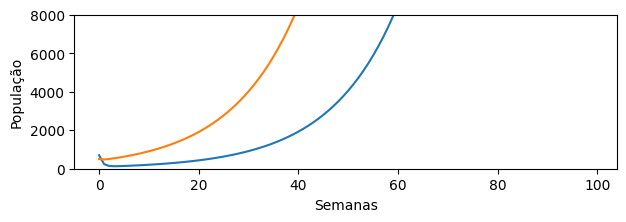

In [26]:
# Resolva seu exercício aqui
A = np.array([[0.2, 0.2], [-0.1,  1.1]])
valores, vetores = np.linalg.eig(A)
print(valores)
print(vetores)

# Haverá uma explosão no número de carcarás e sapos:
x = np.array([[700], [500]])
populacao_carcaras = []
populacao_sapos = []
for _ in range(100):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A @ x
plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
plt.ylim([0,8000])
plt.ylabel('População')
plt.xlabel('Semanas')


(c) Após a publicação de imagens chocantes sobre a caça dos carcarás, foram aprovadas leis de proteção e cuidado ambiental que fazem com que a mortalidade dos carcarás de um mês para o outro seja de apenas 19%. Usando auto-valores e auto-vetores, determine qual é o efeito dessa lei, a longo prazo, para as populações de carcarás e sapos na região.

[0.92298438 0.98701562]
[[-0.87067303 -0.74882458]
 [-0.49186226 -0.66276824]]


Text(0.5, 0, 'Semanas')

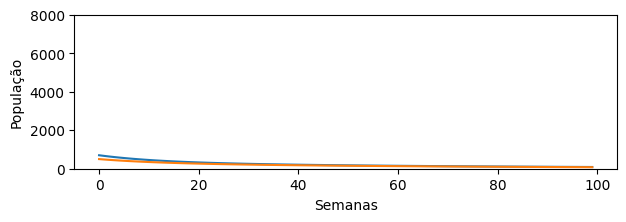

In [27]:
# Resolva seu exercício aqui
A = np.array([[0.81, 0.2], [-0.1,  1.1]])
valores, vetores = np.linalg.eig(A)
print(valores)
print(vetores)

# Todos os carcarás e sapos morrerão:
x = np.array([[700], [500]])
populacao_carcaras = []
populacao_sapos = []
for _ in range(100):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A @ x
plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
plt.ylim([0,8000])
plt.ylabel('População')
plt.xlabel('Semanas')
